# Customer Segmentation Project Based On "RFM"

For on this project we aimed to build a model for identify Customers as a High Profile or Low Profile based on "RFM"

The dataset source is "https://www.kaggle.com/datasets/sergeymedvedev/customer_segmentation?select=customer_segmentation.csv"

In [106]:
import numpy as np
import seaborn as sns
import patsy
import matplotlib.pyplot as plt
import pandas as pd
import re
import sys
from datetime import datetime
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from patsy import dmatrices, dmatrix, demo_data
import statsmodels.api as sm
import math
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler

In [77]:
df=pd.read_csv("cs.csv",encoding='cp1252')

In [78]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [79]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<AxesSubplot: >

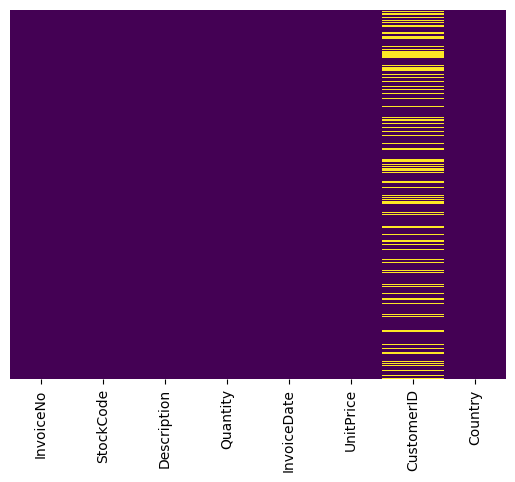

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")



<AxesSubplot: xlabel='UnitPrice'>

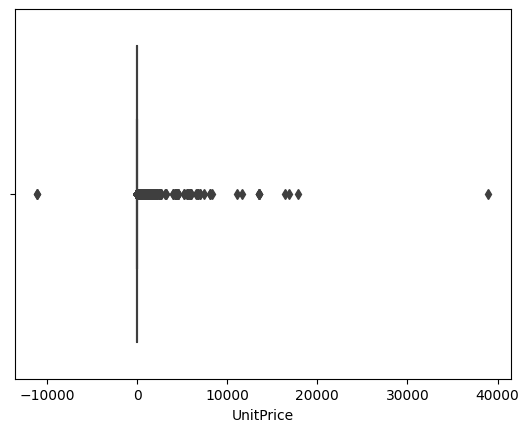

In [10]:
### For Understanding Better "Distribution of Prices" ###
sns.boxplot(x="UnitPrice",data=df)

In [32]:
df["UnitPrice"].max()

38970.0

<AxesSubplot: xlabel='Quantity'>

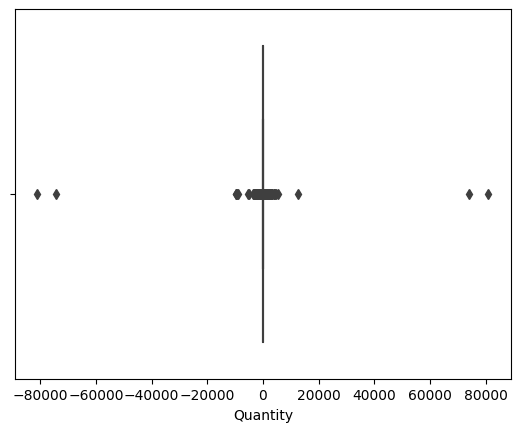

In [11]:
### For Understanding Better "Distribution of Quantities" ###
sns.boxplot(x="Quantity",data=df)

In [88]:
### Filtering UnitPrice and Quantity Columns Data ###
df= df.loc[(df["Quantity"] >= 0) & (df["Quantity"] <= 20000),:]
df= df.loc[(df["UnitPrice"] >= 0) & (df["UnitPrice"] <= 40000),:]

In [89]:
len(df["CustomerID"].unique())

4338

In [81]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [97]:
### Converting Date Data ###
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)


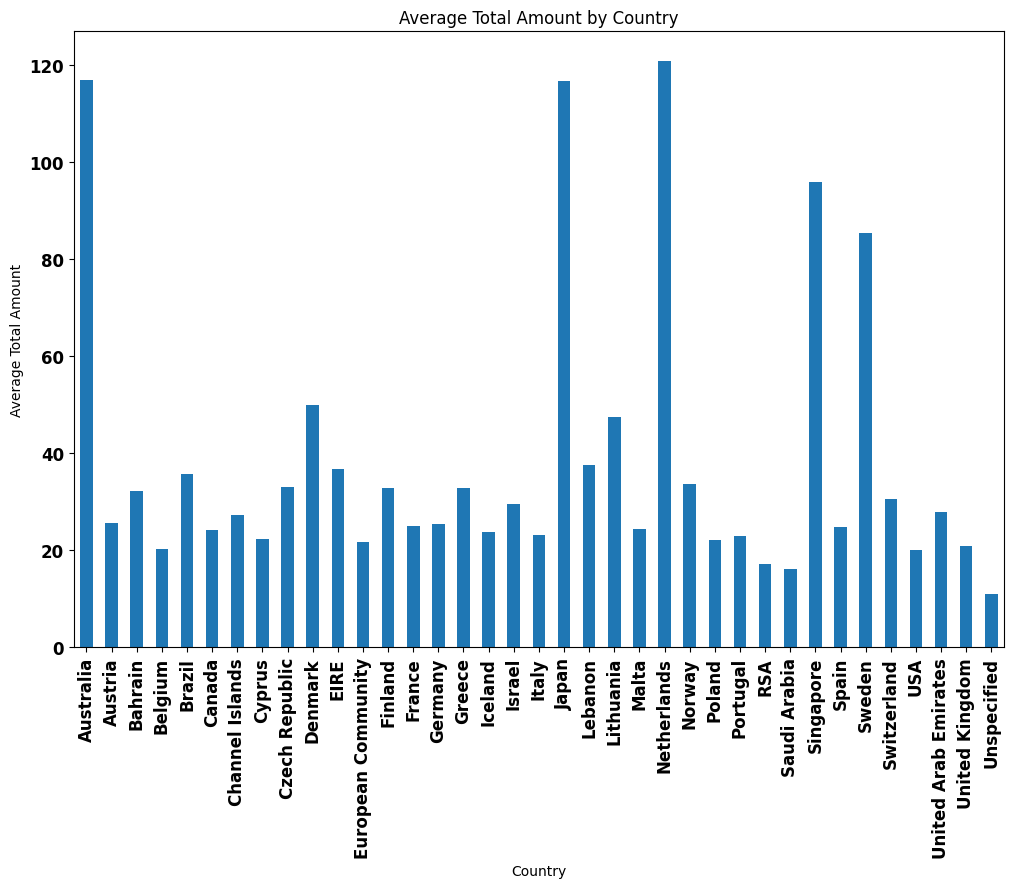

In [83]:
### Defying A new Column For total Amount for checking is there any currency trap or not ###
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]

# Group the data by country and calculate the mean of TotalAmount
country_avg = df.groupby("Country")["TotalAmount"].mean()

# Plot the average total amount for each country
country_avg.plot(kind="bar", figsize=(12,8))
plt.xticks(weight="bold", fontsize=12,)
plt.yticks(fontsize=12,weight="bold")
plt.title("Average Total Amount by Country")
plt.xlabel("Country")
plt.ylabel("Average Total Amount")
plt.show();

In [84]:
df["Quantity"].min()

1

In [90]:
df["Quantity"].max()

12540

In [86]:
df["UnitPrice"].max()

8142.75

In [87]:
df["UnitPrice"].min()

0.0

In [98]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012


In [92]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,14.85


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392730 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392730 non-null  object 
 1   StockCode    392730 non-null  object 
 2   Description  392730 non-null  object 
 3   Quantity     392730 non-null  int64  
 4   InvoiceDate  392730 non-null  object 
 5   UnitPrice    392730 non-null  float64
 6   CustomerID   392730 non-null  float64
 7   Country      392730 non-null  object 
 8   TotalAmount  392730 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.0+ MB


In [94]:
### Having a DataSet only contains Customers###
df_cstmr = pd.DataFrame(df['CustomerID'].unique())
df_cstmr.columns = ['CustomerID']
df_cstmr.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [100]:
#Getting the max purchase date for each customer and create a dataframe with it
cstmr_max_purchase = df.groupby('CustomerID').InvoiceDate.max().reset_index()
cstmr_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
cstmr_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12347.0,2011-12-07 15:52:00
1,12348.0,2011-09-25 13:13:00
2,12349.0,2011-11-21 09:51:00
3,12350.0,2011-02-02 16:01:00
4,12352.0,2011-11-03 14:37:00


In [101]:
# Compare the last transaction of the dataset with last transaction dates of the individual customer IDs.
cstmr_max_purchase['Recency'] = (cstmr_max_purchase['MaxPurchaseDate'].max() - cstmr_max_purchase['MaxPurchaseDate']).dt.days
cstmr_max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12347.0,2011-12-07 15:52:00,1
1,12348.0,2011-09-25 13:13:00,74
2,12349.0,2011-11-21 09:51:00,18
3,12350.0,2011-02-02 16:01:00,309
4,12352.0,2011-11-03 14:37:00,35


In [103]:
#Merge this dataframe to our new user dataframe
cstmr_user = pd.merge(df_cstmr, cstmr_max_purchase[['CustomerID','Recency']], on='CustomerID')
cstmr_user.head()

,CustomerID,Recency
0,17850.0,371
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,333


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

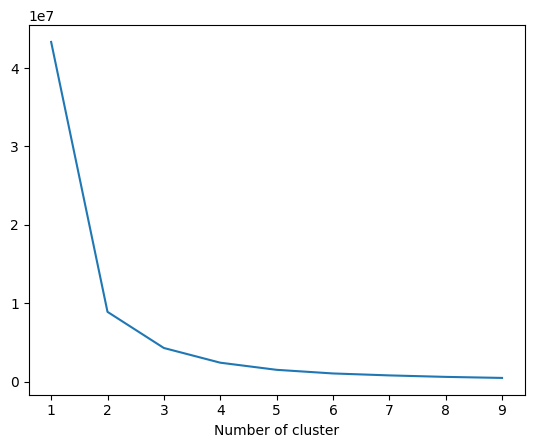

In [109]:
### We are going to apply K-means clustering to assign a recency score.###

###But we should tell how many clusters we need to K-means algorithm.###

###To find it out, we will apply Elbow Method. Elbow Method simply tells the optimal cluster number for optimal inertia.###

sse={} # error
user_recency = cstmr_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_recency)
    user_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show();

In [110]:
### Build 3 clusters for recency and add it to dataframe ###
kmeans = KMeans(n_clusters=3)
cstmr_user['RecencyCluster'] = kmeans.fit_predict(cstmr_user[['Recency']])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [111]:
cstmr_user.head(8)

,CustomerID,Recency,RecencyCluster
0,17850.0,371,1
1,13047.0,31,0
2,12583.0,2,0
3,13748.0,95,2
4,15100.0,333,1
5,15291.0,25,0
6,14688.0,7,0
7,17809.0,15,0


In [112]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

cstmr_user = order_cluster('RecencyCluster', 'Recency',cstmr_user,False)

In [113]:
cstmr_user.head(8)

,CustomerID,Recency,RecencyCluster
0,17850.0,371,0
1,15100.0,333,0
2,18074.0,373,0
3,16250.0,260,0
4,13747.0,373,0
5,12791.0,373,0
6,17908.0,373,0
7,16583.0,373,0


In [115]:
### For Learning How Many Orders Each Customer Does Have ###
user_frequency = df.groupby('CustomerID').InvoiceDate.count().reset_index()
user_frequency.columns = ['CustomerID','Frequency']

user_frequency.head(8)

,CustomerID,Frequency
0,12347.0,182
1,12348.0,31
2,12349.0,73
3,12350.0,17
4,12352.0,85
5,12353.0,4
6,12354.0,58
7,12355.0,13


In [116]:
### Let's add this data to our cstmr_user df ###
cstmr_user = pd.merge(cstmr_user, user_frequency, on='CustomerID')

cstmr_user.head(8)

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,371,0,297
1,15100.0,333,0,3
2,18074.0,373,0,13
3,16250.0,260,0,24
4,13747.0,373,0,1
5,12791.0,373,0,2
6,17908.0,373,0,54
7,16583.0,373,0,14


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_11820\1730765665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\AppData\Lo

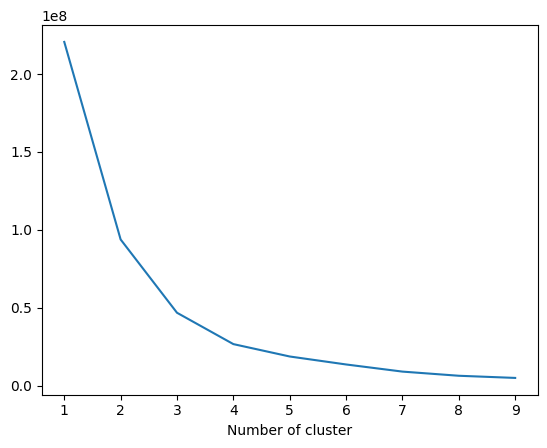

In [118]:
### For Understanding which point is a breakdown for Frequency ###
sse={} # error
user_recency = cstmr_user[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_recency)
    user_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show();

In [120]:
### Looks like 4 is a break point for cluster num ###
kmeans=KMeans(n_clusters=4)
cstmr_user['FrequencyCluster']=kmeans.fit_predict(cstmr_user[['Frequency']])

### Ordering the frequency cluster ###
cstmr_user = order_cluster('FrequencyCluster', 'Frequency', cstmr_user, True )
cstmr_user.groupby('FrequencyCluster')['Frequency'].describe()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3831.0,48.550770,43.314226,1.0,15.0,33.0,71.0,183.0
1,479.0,318.206681,128.638481,184.0,218.0,276.0,381.5,785.0
2,24.0,1309.958333,496.289929,828.0,959.0,1120.0,1517.0,2677.0
3,4.0,5718.000000,1403.252650,4413.0,4936.5,5391.5,6173.0,7676.0


In [121]:
cstmr_user.head(8)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,371,0,297,1
1,15808.0,305,0,195,1
2,12583.0,2,2,247,1
3,14688.0,7,2,324,1
4,16029.0,38,2,241,1
5,12431.0,35,2,235,1
6,13408.0,1,2,478,1
7,13767.0,1,2,368,1


In [123]:
### Now we need to learn "Total Amount" for each customer's spending, It's called Revenue ###
df['Revenue'] = df['UnitPrice'] * df['Quantity']
cstmr_revenue = df.groupby('CustomerID').Revenue.sum().reset_index()

cstmr_revenue.head(8)

,CustomerID,Revenue
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,2506.04
5,12353.0,89.00
6,12354.0,1079.40
7,12355.0,459.40


In [124]:
### Add Revenue data to our manin df ###
cstmr_user = pd.merge(cstmr_user, cstmr_revenue, on='CustomerID')
cstmr_user.head(8)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850.0,371,0,297,1,5391.21
1,15808.0,305,0,195,1,3651.27
2,12583.0,2,2,247,1,7281.38
3,14688.0,7,2,324,1,5579.10
4,16029.0,38,2,241,1,80850.84
5,12431.0,35,2,235,1,6419.95
6,13408.0,1,2,478,1,28117.04
7,13767.0,1,2,368,1,17220.36


In [126]:
cstmr_user.to_csv("cstmr_try.csv")

In [ ]:
sse={} # error
tx_recency = tx_user[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()